In [1]:
import pandas as pd
import matplotlib.pyplot as plt

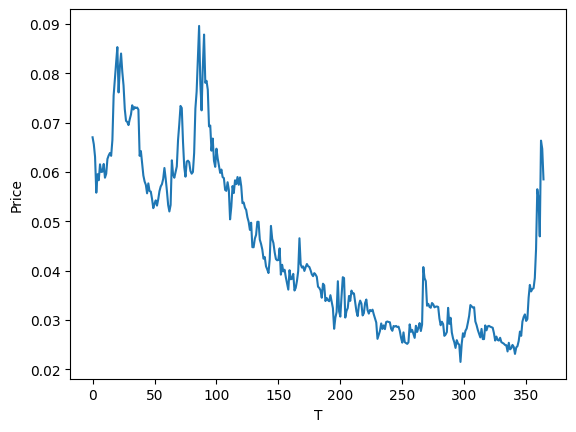

In [2]:
price = pd.read_csv("POKT Historical Price.csv").sort_values(by='Date')['Adj Close']
price.plot(kind='line')
plt.ylabel("Price")
plt.xlabel("T")
plt.show()

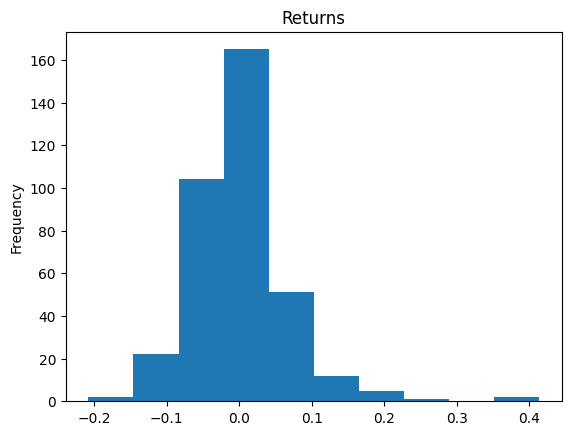

In [3]:
returns = price.pct_change()
returns.plot(kind='hist')
plt.title("Returns")
plt.show()

In [4]:
print(returns.mean())
print(returns.std())
print(returns.skew())
print(returns.kurtosis())

0.00166027149481152
0.06562764398482432
1.6116881741915297
8.526026443263422


In [5]:
print(returns.mean() - .5 * returns.std()**2)

-0.0004932223326879039


In [6]:
print(returns.mean() * 2 - .5 * returns.std()**2)

0.001167049162123616


In [7]:
returns.mean() * 2

0.00332054298962304

In [8]:
price.mean()

0.04405348493150684

In [9]:
price.std()

0.01657532621056741

<Axes: ylabel='Density'>

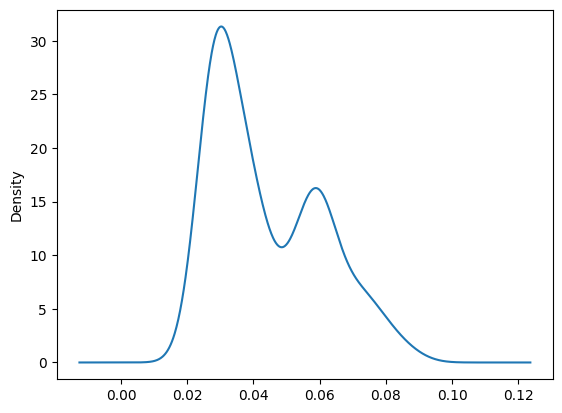

In [15]:
price.plot(kind='density')

In [11]:
from scipy.stats import lognorm

In [16]:
pars = lognorm.fit(price)

In [13]:
type(price)

pandas.core.series.Series

In [17]:
fitted = lognorm.rvs(pars[0], pars[1], pars[2], size = len(price))

(array([147., 119.,  45.,  31.,  13.,   3.,   3.,   1.,   1.,   2.]),
 array([0.02129457, 0.03636823, 0.05144188, 0.06651554, 0.0815892 ,
        0.09666285, 0.11173651, 0.12681016, 0.14188382, 0.15695747,
        0.17203113]),
 <BarContainer object of 10 artists>)

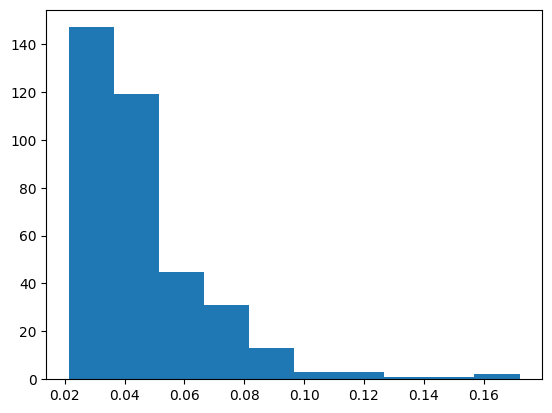

In [21]:
plt.hist(fitted)

<Axes: ylabel='Frequency'>

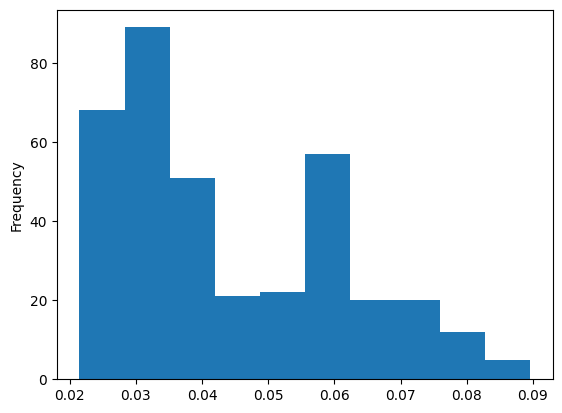

In [22]:
price.plot(kind='hist')

In [23]:
pars

(0.7783747227434171, 0.020085377713065667, 0.01822913696973913)

In [25]:
mu_p = price.mean()
std_p = price.std()
import numpy as np

In [36]:
std = ( np.log ( (std_p/mu_p)**2  + 1 ))**(0.5)
mu = np.log(mu_p) - 0.5 * std**2

In [37]:
std

0.3638713191401966

In [38]:
mu

-3.1885519850880812

In [29]:
(std_p/mu_p)**2

0.14156752161361613

In [30]:
_ + 1

1.141567521613616

In [31]:
np.log(_)

0.13240233689282682

In [32]:
_**(0.5)

0.3638713191401966

In [33]:
np.log((std_p/mu_p)**2)

-1.9549784911666614

In [35]:
(std_p/mu_p)**2

0.14156752161361613

In [40]:
np.exp(mu + 0.5*(std)**2)

0.044053484931506834

In [41]:
price.mean()

0.04405348493150684

In [47]:
np.floor(1 / np.random.exponential(1, size = 100))

array([  0.,   4.,   0.,   2.,  46.,   0.,   7.,  10.,   0.,   0.,   4.,
         0.,   0.,   1.,   0.,   0.,   1.,   2.,   5.,   2., 204.,   1.,
         0.,   1.,   8.,   2.,   0.,   2.,   0.,   4.,   7.,   0.,   0.,
         0.,   1.,   0.,   1.,   0.,   1.,   2.,   7.,   1.,   7.,   0.,
         1.,   1.,   0.,  13.,   0.,   1.,   0.,   1.,   3.,   2.,   0.,
         0.,   4.,   5.,   0.,   3.,   2.,   0.,  10.,   2.,   1.,  30.,
         6.,   0.,   1.,  14.,   3.,   1.,   1.,   6.,   0.,   1.,  12.,
         2.,   0.,   1.,   1.,   8.,   1.,   0.,   0.,  77.,   1.,   0.,
        20.,   0.,   0.,   0.,   2.,   3.,   0.,   0.,   0.,   7.,   2.,
         3.])

(array([96.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <BarContainer object of 10 artists>)

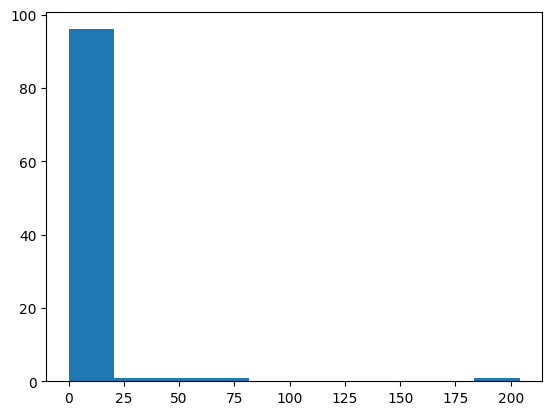

In [48]:
plt.hist(_)

In [57]:
np.floor(1/np.random.exponential(1, size = 100))

array([  0.,   0.,   8.,   2.,   0.,   0.,   1.,   4.,   2.,  33.,  33.,
         1.,   1.,   1.,   0.,   5.,  97.,   0., 240.,   1.,   0.,   7.,
         0.,   1.,   1.,   6.,   1.,   0.,   2.,   1.,   3.,   0.,   0.,
         0.,   1.,   3.,   9.,   1.,   1.,   0.,   0.,   9.,   0.,   2.,
         0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
         3.,   0.,   3.,   1.,   0.,   1.,   1.,   0.,   1.,  33.,   6.,
         1.,   2.,   1.,   0.,   3.,   0.,   1.,   0.,   7.,   3.,   0.,
         2.,   0.,   0.,  50.,   2.,   0.,   1.,   2.,   2.,   0.,   3.,
         0.,   6.,   3.,   1.,   4.,   5.,  15.,   5.,   1.,  11.,   0.,
         0.])

In [60]:
def sig(mu, mu_p = 0.04405348493150684):
    return np.sqrt ( 2 * (np.log(mu_p) - mu) )

In [75]:
sig(-8)

3.1233473016487716

In [62]:
sig(-5)

1.937859222626005

In [67]:
sig(-20)

5.80993101221664